<img src="c2fo_python.png">

# Leveraging Python for Data Visibility - Maximizing the view into our data by creating a lightweight stand alone webapp and integrating interactive plotting libraries

In this talk we aim to help python users maximize their information gain with some easy to use libraries, specifically Spyre, Bokeh, and Pygal

---

## About me
My name is Matthew Russell, and I'm one of the Data Scientists here at C2FO, the world's market for working capital. After earning my BS and MS in Physics, I left academia to find something new, and stumbled upon the world of data science. After using python in my graduate research, I naturally gravitated to the libraries that have been making significant headway for data science in the past few years, and I will be sharing and presenting several of these libraries to you today.

## Contact Info
 - Email - matthew.russell@c2fo.com
 - Github - pm8k

--------


# Topic Headers
 1. How as Data Scientists do we access our Data?
 - Introduction to Data Spyre: What is it?
 - Alright, this looks Cool! How do I make my own Webapp?
 - How do I make my Cool webapp even Cooler?
 - Let's get Interactive with some plotting libraries!
 - The Grand Finale: Interactive plots in Data Spyre!
 - Questions?


--------

# 1. How as Data Scientists do we access our Data?
 - What are some of the common tools you work with visualize your data?
 - What problems challenge you with your workflow?

## Our talk will help to address the following questions:
- How can I provide the best view into my data? 
- How can I easily introduce aggregations and filtering into my workflow? 
- How do I share my data with decision makers?
- How can I maximize my information within one visualization?

---

<img src=18271-good-news-everyone-i-was-just-kidding-professor-farnsworth-wallpaper-1280x1280-1-750x410.jpg />

## Good News! Python has some new libraries to help us in our just cause in the pursuit of data!

### In this talk I'm going to introduce Data Spyre, a lightweight interactive web application built on python.  Inspired by R's Shiny, Data Spyre creates an easy to use framework to customize how you need to look at your data.

### I will also be covering Pygal, Bokeh, and BQplot, a series of libraries to add some interactivity to your plotting toolkit.

## Here is the location of all the libraries we will be discussing
 - Data Spyre - https://github.com/adamhajari/spyre
 - Bokeh - http://bokeh.pydata.org/en/latest/
 - Pygal - http://www.pygal.org/en/latest/
 - BQPlot - https://github.com/bloomberg/bqplot

-------

# 2. Introduction to Data Spyre: What is it?

### Data Spyre is a python implementation of a web facing application inspired by R's Shiny. It is structured to cover most of the front end and back end work to standing up a web application, only requiring you to define what to plot and what data to show.  In order to accomplish this, data spyre leverages the power of 4 well established libraries:

 - Cherrypy - Python Web application library to handle front and back end (Webapp)
 - Jinja2 - Python Templating library based off of Django's templates (HTML and Javascript)
 - Pandas - Python library for data aggregation, filtering, and plotting (Data Manipulation)
 - Matplotlib - Python's plotting library (Plots)

## Script 1

In [ ]:
from spyre import server

class SimpleApp(server.App):
    title = "Simple App"
    inputs = [{ "type":"text",
                "key":"words",
                "label": "write here",
                "value":"hello world"}]
    outputs = [{"type":"html",
                "id":"some_html",
                "control_id":"button1"}]
    controls = [{"type":"button",
                 "label":"press to update",
                 "id":"button1"}]
    def getHTML(self, params):
        words = params['words']
        return "Here are some words: <b>%s</b>"%words

app = SimpleApp()
#app.launch()

### With just a few lines of code, we have a webapp we can launch from our browser.  While we aren't looking at any data in this example, we have all of the important elements for our web application:
 - An input to help control what our web app displays
 - A control mechanism that updates the text on the page
 - A function that creates the output onto the webapp

### Let's look at something with some data... how about a simple sine wave?

## Script 2

In [ ]:
from spyre import server

import matplotlib.pyplot as plt
import numpy as np

class SimpleSineApp(server.App):
    title = "Simple Sine App"
    inputs = [{ "type":"text",
                "key":"freq",
                "value":5,
                "label":"frequency",
                "action_id":"sine_wave_plot"}]
    outputs = [{"type":"plot",
                "id":"sine_wave_plot"}]
    controls = [{"type":"HIDDEN",
                 "id":"sine_wave_plot"}]
    def getPlot(self, params):
        f = float(params['freq'])
        x = np.arange(0,2*np.pi,np.pi/150)
        y = np.sin(f*x)
        fig = plt.figure()
        splt1 = fig.add_subplot(1,1,1)
        splt1.plot(x,y)
        return fig

if __name__ == '__main__':
    app = SimpleSineApp()
    #app.launch()

### Similar to the previous app, we have defined an input, a control, and a function to generate output onto our webapp, all in just a few lines of code! 

----------------------------

# 3. Alright, this looks Cool! How do I make my own?

### So far we've seen a couple of these webapps in action, so let's go down the rabbit hole a bit further and see what's actually going on under the hood of our Data Spyre class. Let's look again at the Sine App we just had up

## Script 3

In [ ]:
from spyre import server

import matplotlib.pyplot as plt
import numpy as np

class SimpleSineApp(server.App):
    title = "Simple Sine App"
    inputs = [{ "type":"text",
                "key":"freq",
                "value":5,
                "label":"frequency",
                "action_id":"sine_wave_plot"}]
    outputs = [{"type":"plot",
                "id":"sine_wave_plot"}]
    controls = [{"type":"HIDDEN",
                 "id":"sine_wave_plot"}]
    def getPlot(self, params):
        f = float(params['freq'])
        x = np.arange(0,2*np.pi,np.pi/150)
        y = np.sin(f*x)
        fig = plt.figure()
        splt1 = fig.add_subplot(1,1,1)
        splt1.plot(x,y)
        return fig

if __name__ == '__main__':
    app = SimpleSineApp()
    #app.launch()

### The main wrapper for our web application is a python class, which inherits from dataspyre's server.App class.  Don't worry too much of the details of the class inheritance, other than the structure of your class objects needs to be correctly defined for your webapp to run smoothly.  So we start with naming our class, and pass in server.App as the inherited class. Now within the class we need to define a few parameters that is the key to any app:

### title 
A string that represents the name of your webapp.  In our case, it is "Simple Sine App". Only one title is assigned per webapp

### inputs
The inputs variable is a python list of dictionaries, with each dictionary representing another input variable.  In our example, we have one input: frequency.  Let's breakdown each of the elements quickly that make up an input:
 1. label - The text name to be displayed for your key
 2. type - The type of input to be created. In our webapp, we have a text box, which is created as type 'text'.  We have also seen type 'slider' in our previous example.
 3. value - The default value for the webapp upon initial load.  When the value is changed by the user, the dictionary reflects this change
 4. key - The key is used as the name reference in the data and plotting functions.  They are stored in class dictionary called 'params' keyed by this key value.  
 5. Action Id - The Action Id is used to tie which control to use, which we will be going over next.

### controls
The control variable is also a list of python dictionaries.  Each dictionary contains one control to tie a set of inputs and outputs together. What exactly does the control do? The control updates your data based on any changes you make to the input.  When there are multiple inputs and/or multiple outputs, multiple controls allow you to refresh specific points in your data.  The control has three properties:
 1. type - defines whether a control is 'hidden' or is a 'button'. Hidden allows the output to update upon change of input, while a button must be pressed to update your changes.

 2. label - if the control type is a button, the label will be the text on the button.

 3. id - the control id to identify which inputs and outputs are controlled by this id.  Any inputs with the 'action_id' the same as this id trigger this control, and all outputs with an action_id with this id will be refreshed with new data.

### outputs
And once again, our output variable is defined as a list of dictionaries, with each dicitonary tied to a single output. In our webapp, an output is a data object being returned to our webapp to be displayed. Lets dive back in to what makes up an output entry:
 1. type - This tells the webapp which kind of data object is being returned as an output.  The main three types of output are table (pandas dataframe), plot (matplotlib figure object), or html.

 2. control_id - Once again, this id ties back to a control we've already defined.  This output will update when the specified control is triggered by the output.

 3. tab - The name of the tab to display your output.  So far we've only demonstrated a single output webapp, but when you have multiple outputs, you can specify what location each output goes to. We'll dive a bit more into this later.

 4. on page load - a boolean flag to tell the webapp whether to load the page upon connecting to the web server. Generally you will want to set this to true.

 5. id - a seemingly deceptive trait.  Each output requires an id name which will be parsed to act as an identifier for the output.  However, the true functionality comes with function overloading. Again, let's get a simple app up and running and we can dive more into the customization we can introduce.
     

<img src=input_output_control_large.png/>

### Sweet! All of our inputs and outputs are created, and we know how to control everything! Now all we need to do is define where we get our data from.  Data Spyre has built in function types to handle our main 3 output types: getData, getPlot, getHTML.  Each one has its own return type as previously specified.  And here is where the magic happens: The user can define these functions to create the data representation that they want to return, return the appropriate object, and your webapp is ready to go!  Lets look at the sine getPlot example:

## Plot Function

In [ ]:
def getPlot(self, params):
    f = float(params['freq'])
    x = np.arange(0,2*np.pi,np.pi/150)
    y = np.sin(f*x)
    fig = plt.figure()
    splt1 = fig.add_subplot(1,1,1)
    splt1.plot(x,y)
    return fig

### Our getPlot function takes 2 arguments: self, because we are working with a class object, as well as params, which is the current values of all objects in our input.  Note that we don't actually call this function ourselves, Data Spyre does it for us, and it is expecting us to pass the params object, so even if your function doesn't require the params dictionary, it still needs to be passed in.  The rest of the function is a simple matplotlib figure.  As you can see, we get our frequency from the params dictionary by subsetting on the name 'freq' which we defined in the inputs.  At the end we return a matplotlib figure, which Data Spyre takes and displays on the web app.

### Alright, cool, we've got ourselves a simple webapp with a graph.  What if we wanted to display not just the plot, but the data behind it as well? That's easy!  We just need to introduce tabs.  Tabs is a list of strings that will be created in the webapp. Each tab should be tied to one unique output. As explained earlier, we can tie in the tab name as a parameter of the output.  Let's look back to our sine example:

## Script 4

In [ ]:
from spyre import server

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

class SimpleSineApp(server.App):
    title = "Simple Sine App"
    inputs = [{ "type":"text",
                "key":"freq",
                "value":5,
                "label":"frequency",
                "action_id":"sine_wave_plot"}]
    tabs=["Plot","Data"]
    outputs = [{"type":"plot",
                "id":"wave_plot",
                "tab":"Plot",
                "control_id":"sine_wave_plot"},
                {"type":"table",
                "id":"wave_data",
                "tab":"Data",
                "control_id":"sine_wave_plot"}]
    controls = [{"type":"HIDDEN",
                 "id":"sine_wave_plot"}]
    def getPlot(self, params):
        f = float(params['freq'])
        df=self.getData(params)
        fig = plt.figure()
        splt1 = fig.add_subplot(1,1,1)
        splt1.plot(df.x,df.y)
        return fig
    def getData(self,params):
        f=float(params['freq'])
        x = pd.Series(np.arange(0,2*np.pi,np.pi/150))
        y = pd.Series(np.sin(f*x))
        df=pd.concat([x,y],axis=1)
        df.columns=['x','y']
        return df

if __name__ == '__main__':
    app = SimpleSineApp()
    #app.launch()

### Lets dive into what's new to our code:

 1. We've added a tabs list to control how we want our outputs organized
 2. Each ouput now has a "tab" parameter which we can link to our tabs list we created
 3. We've added a getData function to our class. Note that it takes the same arguments as the getPlot function.  DataSpyre knows to call the getPlot function for the plot tab and it knows to call the getData function for the table tab.  
 4. We've now introduced pandas into our workflow.  As you can see, we create a pandas dataframe, and return it for the getData Function
 5. In addition, we now utilize our getData function in our getPlot function, so we only have one function to generate the data used for the plot and table.

### We've now got a working webapp with a control as well as multiple tabs to show both plot and data! And the best part, is it took less than 40 lines of code, including import statements. This simple framework can get you running with your data quickly with little overhead.  

<img src=thats-cool-i8t8sz.jpg/>

---

# 4. How do I make my Cool WebApp even Cooler?

### Alright, we've got a easy, lightweight to use app. However, as with any data project, our needs move outside the realm of simple and require us to dive in deeper.  Let's go into how we can increase the functionality in our webapp.

## A. Maximize the most out of our getData Function
We had a really simple getData Function before, where we input a frequency and generated a sine wave. Generally, we won't be generating data on the fly.  We'll want to select a portion of our data that we already have. There are many ways to do this.
 - We can define a global dataFrame and subset that based on our input
 - We can read in data locally from the filesystem
 - We can create some dynamic sql and pull in data based on our input 
 - We could even scrape the data from a website given some input
 
Long story short, we have a number of ways to get the data we want into our webapp, the question is about which method best suits your needs.

## B. Function Overload!

So far we've mentioned how we can define getData, getPlot, getHTML functions in order to tell Data Spyre what type of data to generate for the web application.  However, this becomes a problem when we want to have multiple functions of the same datatypes. Data Spyre has a simple solution to this, function overloading! 

## Script 5

In [ ]:
from spyre import server

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

class SimpleSineApp(server.App):
    title = "Simple Sine App"
    inputs = [{ "type":"text",
                "key":"freq",
                "value":5,
                "label":"frequency",
                "action_id":"sine_wave_plot"}]
    tabs=["Plot1","Plot2","Data"]
    outputs = [{"type":"plot",
                "id":"wave_plot",
                "tab":"Plot1",
                "control_id":"sine_wave_plot"},
                {"type":"plot",
                "id":"wave_plot2",
                "tab":"Plot2",
                "control_id":"sine_wave_plot"},
                {"type":"table",
                "id":"wave_data",
                "tab":"Data",
                "control_id":"sine_wave_plot"}]
    controls = [{"type":"HIDDEN",
                 "id":"sine_wave_plot"}]
    def wave_plot(self, params):
        f = float(params['freq'])
        df=self.wave_data(params)
        fig = plt.figure()
        splt1 = fig.add_subplot(1,1,1)
        splt1.plot(df.x,df.y1)
        return fig
    def wave_plot2(self, params):
        f = float(params['freq'])
        df=self.wave_data(params)
        fig = plt.figure()
        splt1 = fig.add_subplot(1,1,1)
        splt1.plot(df.x,df.y2)
        return fig
    def wave_data(self,params):
        f=float(params['freq'])
        x = pd.Series(np.arange(0,2*np.pi,np.pi/150))
        y1 = pd.Series(np.sin(f*x))
        y2 = pd.Series(np.sin(2*f*x))
        df=pd.concat([x,y1,y2],axis=1)
        df.columns=['x','y1','y2']
        return df

if __name__ == '__main__':
    app = SimpleSineApp()
    #app.launch()

Let's look at our new class object. What exactly did we do here?
- In this example we've introduced function overloading. We've renamed our getData and getPlot functions to represent the "id" of each output tied to the output. 
- Because of this, we're no longer tied to overriding Data Spyre's getData, getPlot and getHTML functions.
- Why does this work? Data spyre will parse the class function names for the given output ids, and if it detects any matches, it will call the given function instead of the type default.

## C. One input is never enough!

So far we've worked with a single text input.  There are multiple other inputs we can use in addition or instead of a text box. Let's look at all of the options in another webapp:

## Script 6

In [ ]:
from spyre import server

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

class SimpleSineApp(server.App):
    title = "Simple Sine App"
    inputs = [{ "type":"text",
                "key":"freq",
                "value":5,
                "label":"frequency",
                "action_id":"sine_wave_plot"},
                { "type":"radiobuttons",
                "key":"func_type",
                "label":"func_type",
                "action_id":"sine_wave_plot",
                "options":[
                    {"label":"Sine","value":"sin","checked":True},
                    {"label":"Cosine","value":"cos"}]},
                { "type":"dropdown",
                "key":"datatoplot",
                "options":[
                    {"label":"x","value":"y1"},
                    {"label":"2x","value":"y2"}],
                "label":"Data to Plot",
                "action_id":"sine_wave_plot"},
                { "type":"slider",
                "key":"x_slider",
                "value":100,
                "min":1,
                "max":200,
                "label":"x_axis",
                "action_id":"sine_wave_plot"},
                { "type":"checkboxgroup",
                "key":"checkboxes",
                "options":[
                    {"label":"show x gridlines","value":"showx","checked":True},
                    {"label":"show y gridlines","value":"showy"}
                ],
                "label":"Plot Options",
                "action_id":"sine_wave_plot"}]
    tabs=["Plot","Data"]
    outputs = [{"type":"plot",
                "id":"wave_plot",
                "tab":"Plot",
                "control_id":"sine_wave_plot"},
                {"type":"table",
                "id":"wave_data",
                "tab":"Data",
                "control_id":"sine_wave_plot"}]
    controls = [{"type":"HIDDEN",
                 "id":"sine_wave_plot"}]
    def getPlot(self, params):
        f = float(params['freq'])
        data = params['datatoplot']
        checkboxlist=params['checkboxes']
        df=self.getData(params)
        fig = plt.figure()
        splt1 = fig.add_subplot(1,1,1)
        splt1.plot(df.x,df[data])
        if 'showx' in checkboxlist:
            splt1.xaxis.grid(True)
        if 'showy' in checkboxlist:
            splt1.yaxis.grid(True)
        return fig
    def getData(self,params):
        f=float(params['freq'])
        index=int(params['x_slider'])
        functouse=params['func_type']
        funcdict={"sin":np.sin,"cos":np.cos}
        func=funcdict[functouse]
        x = pd.Series(np.arange(0,2*np.pi,np.pi/150))
        y1 = pd.Series(func(f*x))
        y2 = pd.Series(func(2*f*x))
        df=pd.concat([x,y1,y2],axis=1)
        df.columns=['x','y1','y2']
        return df[:index]

if __name__ == '__main__':
    app = SimpleSineApp()
    #app.launch()

As you can see, we've got 5 types of inputs. Each has its own quirks in terms of how you structure the input, but follow the same basic structure as the text.  Let's play around with a few...

Alright! As we all know, various use cases require unique solutions, and this should cover most if not all.

## D. Multiple Controls to handle the inputs amongst your tabs

So far we've created multiple inputs in order to update our webapp.  However, we've limited it all to a single control.  If any input was changed, all tabs will refresh.  Sometimes this is unnecessary, and potentially unwanted. Let's look at an example where we have multiple controls:

## Script 7

In [ ]:
from spyre import server

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

class SimpleSineApp(server.App):
    title = "Simple Sine App"
    inputs = [{ "type":"slider",
                "key":"x_slider",
                "value":200,
                "min":1,
                "max":200,
                "label":"x_axis",
                "action_id":"sine_wave_plot"},{ "type":"text",
                "key":"freq",
                "value":5,
                "label":"frequency",
                "action_id":"sine_wave_data"}]
    tabs=["Plot","Data"]
    outputs = [{"type":"plot",
                "id":"wave_plot",
                "tab":"Plot",
                "control_id":"sine_wave_data"},
                {"type":"table",
                "id":"wave_data",
                "tab":"Data",
                "control_id":"sine_wave_plot"}]
    controls = [{"type":"HIDDEN",
                 "id":"sine_wave_plot"},
                 {"type":"HIDDEN","id":"sine_wave_data"}]
    def getPlot(self, params):
        f = float(params['freq'])
        index=int(params['x_slider'])
        df=self.getData(params)
        fig = plt.figure()
        splt1 = fig.add_subplot(1,1,1)
        splt1.plot(df.x,df.y)
        return fig
    def getData(self,params):
        f=float(params['freq'])
        index=int(params['x_slider'])
        x = pd.Series(np.arange(0,2*np.pi,np.pi/150))
        y = pd.Series(np.sin(f*x))
        df=pd.concat([x,y],axis=1)
        df.columns=['x','y']
        return df[:index]

if __name__ == '__main__':
    app = SimpleSineApp()
    #app.launch()

While this may not demonstrate the best use case for it, we can clearly see how multiple controls allow us to modify the data in some tabs within our webapp while leaving others untouched.  This is all controlled through the list of controls above, and tying each input and output with the respective control id

## E. Accessing Cherrypy root objects to store local files

Alright, lets take a step back a minute and go back to our roots, literally.  As I mentioned in the beginning of this talk, Data Spyre is built on top of Cherrypy for the backend web portion.  However, as with any wrapper, you may lose functionality that the more granular class object has.  In our example, we don't have access to all of the features of Cherrypy.  While there are other features that may be lost, an important one that is useful is being able to access specified directories from the filesystem as part of the webapp.  Let's go through the process, and we'll see a great example of how this is useful.

## Access Cherrypy Root

In [ ]:
def initiate_directs(self,params):
    root=self.getRoot()
    current_dir=os.path.dirname(os.path.abspath("__file__"))
    config_public={
    '/':{
        'tools.staticdir.root' : current_dir,
        },
     '/static': {
         'tools.staticdir.on': True,
         'tools.staticdir.dir': 'public',
         'tools.staticdir.content_types':{'.min.js':"text/javascript",'svg':"image/svg+xml"}

     }
    }
    cherrypy.tree.mount(root, "/", config=config_public)


In order to directly modify our cherrypy instance, we must get access to its root object.  After experimenting around a bit, I got the following method to work.  Keeping in mind that the Data Spyre application inherits the properties of the Cherrypy app class, we can directly access the root once the class has been initiated.  I managed to do this by defining a function and calling it through the output directories in data spyre.  It isn't linked to a tab, but the code still runs. I list it first in my list so that it will run first, guaranteeing i have access for all my output runs.

Lets dive into what's going on here: The gist of the config_public dictionary links specific directories in my file system to my webapp.  In this example, the directory I am in has a folder 'public', and it is accessable by adding '/static/' to your hyperlink within your webapp.  Once we've established this linking, we mount it onto our cherrypy instance. And voila! We now have access to our filesystem through our cherrypy server.


## F. Let's build an app with multiple elements on a single page!

So far we've leveraged the ability to create multiple tabs, either with data or plots on each tab. However, we currently don't have the capability to introduce multiple elements onto a single page.  We could concat multiple dataframes in order to show them all in one tab, and we could leverage matplotlibs subplots to get multiple plots in a single figure. However, we can't get plots and tables onto a single page. In order to do this, we can leverage the getHTML function (along with our cherrypy root) in order to get everything we want into a single page.

## Script 8

In [ ]:
from spyre import server

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import cherrypy
class SimpleSineApp(server.App):
    title = "Simple Sine App"
    inputs = [{ "type":"text",
                "key":"freq",
                "value":5,
                "label":"frequency",
                "action_id":"sine_wave_plot"}]
    outputs = [{"type" : "html",
                "id" : "initiate_directs",
                "on_page_load" : True },
                {"type":"html",
                "id":"wave_plot_and_data",
                "control_id":"sine_wave_plot"}]
    controls = [{"type":"HIDDEN",
                 "id":"sine_wave_plot"}]
    def initiate_directs(self,params):
        root=self.getRoot()
        current_dir=os.path.dirname(os.path.abspath("__file__"))
        config_public={
        '/':{
            'tools.staticdir.root' : current_dir,
            },
         '/static': {
             'tools.staticdir.on': True,
             'tools.staticdir.dir': 'public',
             'tools.staticdir.content_types':{'.min.js':"text/javascript",'svg':"image/svg+xml"}
         }
        }
        cherrypy.tree.mount(root, "/", config=config_public)
    def wave_plot_and_data(self, params):
        f = float(params['freq'])
        df=self.getData(params)
        fig = plt.figure()
        splt1 = fig.add_subplot(1,1,1)
        splt1.plot(df.x,df.y)
        fig.savefig('public/ourfig.png')
        dfhtml=df[:20].to_html(index=False)
        html='<img src="static/ourfig.png"/>'
        finalhtml=html+"<br>"+dfhtml
        return finalhtml
    def getData(self,params):
        f=float(params['freq'])
        x = pd.Series(np.arange(0,2*np.pi,np.pi/150))
        y = pd.Series(np.sin(f*x))
        df=pd.concat([x,y],axis=1)
        df.columns=['x','y']
        return df

if __name__ == '__main__':
    app = SimpleSineApp()
    #app.launch()

Now, lets go into what just happened here really quickly. 
 - We've created a function that returns some html to be loaded. 
 - To get our image and dataframe onto the same page, we had to mount a directory onto the cherrypy server.  
 - We added a simple image tag in our html, citing the source as our relative html path defined by our cherrypy server.  
 - We saved our file to the directory 'public', which maps to the '/static/' directory in our webapp, allowing us to access our image.  
 - Lastly, pandas dataframes have a handy to_html function which lets us create an html table from our dataframe!
 
Now while I haven't done any formatting, some simple python string replacement functions can be used to modify the html we just created to customize any number of features of our html page, allowing you to present a customly designed front end to data spyre!

## G. Yeshup? No, Nohup!

From what we've seen in these examples, we have a python connection that stays open in the terminal while we have our webapp running.  However, we can make this a background process with nohup! we simply need to call our script as:

        nohup python script.py &


This will run the webapp as a background process. Woo!


## H. Updating your webapp

So far we've also run through several example of how we can update our webapp. However, you don't always want to restart your webapp, especially if you used nohup.  An easy way to update your server is by simply updating the file that the server is referencing.  If you make some changes and save it, or replace the file with a new file of the same name, your webapp will automatically update the chanages! Simple, but effective.

---

# 5. Let's get Interactive with some plotting libraries!

### We've been getting in depth into all the inner workings of Data Spyre , so let's take a step back and focus on our visualizations. While matplotlib is very extensible for most purposes, there are some other great plotting libraries that bring your plotting visualizations to a whole new level, especially with interactivity.  Let's dive into a few of them:

## A. Bokeh

Bokeh is a Python interactive visualization library that targets modern web browsers for presentation. Its goal is to provide elegant, concise construction of novel graphics in the style of D3.js, but also deliver this capability with high-performance interactivity over very large or streaming datasets.

Bokeh is very easy to use, and offers a variety of tools to enhance your plot experience, such as hovering, zooming, and selection.  It also has a variety of outputs, such as exporting your plot to its own html page, or you could embed it into another html page. It is also built for Jupyter notebook integration, as you can see below.

## Bokeh Example 1 - Zooming, Panning, and Selection


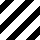
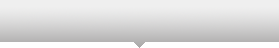
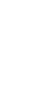
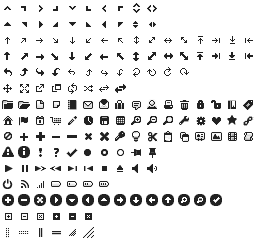
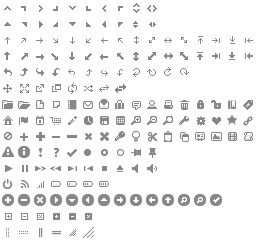
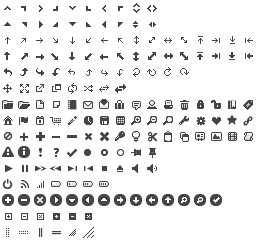
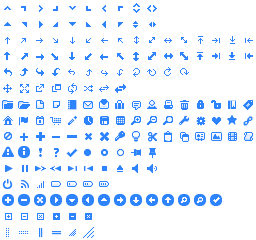
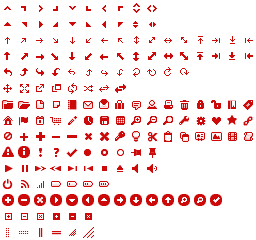
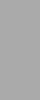
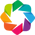
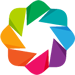
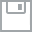
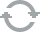
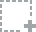
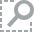
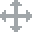
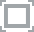
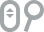

In [6]:
import numpy as np

from bokeh.plotting import figure, show, output_file, vplot
from bokeh.io import output_notebook
N = 100

x = np.linspace(0, 4*np.pi, N)
y = np.sin(x)

#output_file("legend.html", title="legend.py example")

TOOLS = "pan,wheel_zoom,box_zoom,reset,save,box_select"

p2 = figure(title="Another Legend Example", tools=TOOLS)

p2.circle(x, y, legend="sin(x)")
p2.line(x, y, legend="sin(x)")

p2.line(x, 2*y, legend="2*sin(x)",
    line_dash=[4, 4], line_color="orange", line_width=2)

p2.square(x, 3*y, legend="3*sin(x)", fill_color=None, line_color="green")
p2.line(x, 3*y, legend="3*sin(x)", line_color="green")
output_notebook()
show(p2)# open a browser

## Bokeh Example 2 - Hovering


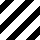
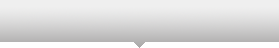
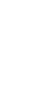
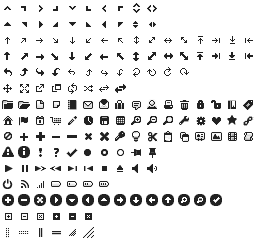
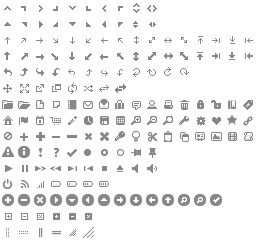
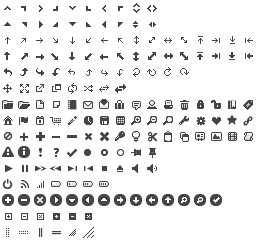
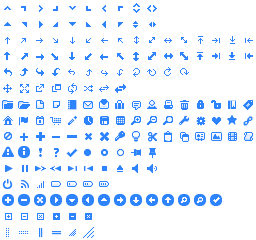
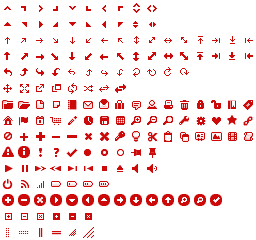
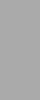
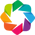
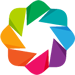
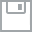
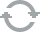
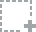
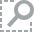
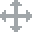
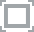
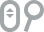

In [7]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool
from bokeh.io import output_notebook

source = ColumnDataSource(
        data=dict(
            x=[1, 2, 3, 4, 5],
            y=[2, 5, 8, 2, 7],
            desc=['A', 'b', 'C', 'd', 'E'],
            imgs = [
                'http://bokeh.pydata.org/static/snake.jpg',
                'http://bokeh.pydata.org/static/snake2.png',
                'http://bokeh.pydata.org/static/snake3D.png',
                'http://bokeh.pydata.org/static/snake4_TheRevenge.png',
                'http://bokeh.pydata.org/static/snakebite.jpg'
            ]
        )
    )

hover = HoverTool(
        tooltips="""
        <div>
            <div>
                <img
                    src="@imgs" height="42" alt="@imgs" width="42"
                    style="float: left; margin: 0px 15px 15px 0px;"
                    border="2"
                ></img>
            </div>
            <div>
                <span style="font-size: 17px; font-weight: bold;">@desc</span>
                <span style="font-size: 15px; color: #966;">[$index]</span>
            </div>
            <div>
                <span style="font-size: 15px;">Location</span>
                <span style="font-size: 10px; color: #696;">($x, $y)</span>
            </div>
        </div>
        """
    )

p = figure(plot_width=400, plot_height=400, tools=[hover],
           title="Mouse over the dots")

p.circle('x', 'y', size=20, source=source)
output_notebook()
show(p)

## Bokeh Example 3 - Color Based Selection and Lasso Selection


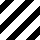
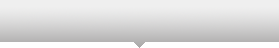
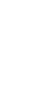
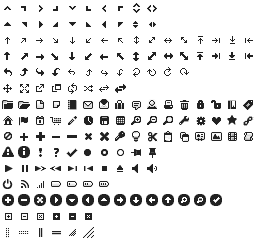
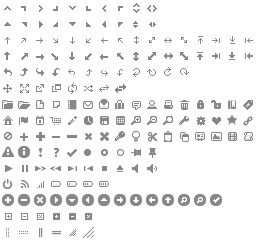
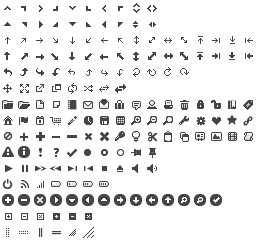
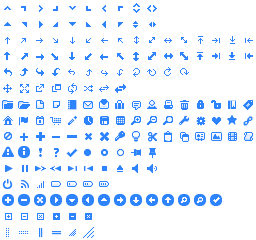
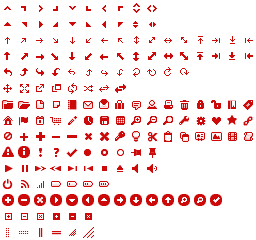
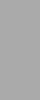
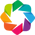
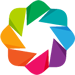
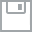
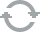
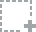
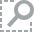
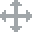
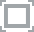
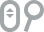

In [8]:
import numpy as np
from six.moves import zip

from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
N = 4000

x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = ["#%02x%02x%02x" % (r, g, 150) for r, g in zip(np.floor(50+2*x), np.floor(30+2*y))]

TOOLS="resize,crosshair,pan,wheel_zoom,box_zoom,reset,tap,previewsave,box_select,poly_select,lasso_select"


p = figure(tools=TOOLS)
p.scatter(x, y, radius=radii, fill_color=colors, fill_alpha=0.6, line_color=None)
output_notebook()
show(p)  # open a browser

Awesome! We've got some awesome plots! Let's take a look at pygal next.

## B. Pygal

Pygal is library that claims to offer both 'Sexy Python Charting' and 'Simple Python Charting'. If you don't believe me, look up their site. But honestly, this library is very easy to use, and offers some cool interactive plotting features, including hovering as well as toggling for data sets. 

Disclaimer! In this talk I have some pygal plots rendering in the iPython Notebook, but the full functionality is not present. We will get a better feel for the full functionality in a webapp example at the end of the talk.

## Pygal Example 1 - Line Highlighting

In [9]:
%matplotlib inline
from IPython.display import SVG, HTML
html_pygal = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/pygal-tooltips.js"></script>
    <!-- ... -->
  </head>
  <body>
    <figure>
      {pygal_render}
    </figure>
  </body>
</html>
"""

import pygal
line_chart = pygal.Line()
line_chart.title = 'Browser usage evolution (in %)'
line_chart.x_labels = map(str, range(2002, 2013))
line_chart.add('Firefox', [None, None,    0, 16.6,   25,   31, 36.4, 45.5, 46.3, 42.8, 37.1])
line_chart.add('Chrome',  [None, None, None, None, None, None,    0,  3.9, 10.8, 23.8, 35.3])
line_chart.add('IE',      [85.8, 84.6, 84.7, 74.5,   66, 58.6, 54.7, 44.8, 36.2, 26.6, 20.1])
line_chart.add('Others',  [14.2, 15.4, 15.3,  8.9,    9, 10.4,  8.9,  5.8,  6.7,  6.8,  7.5])
HTML(html_pygal.format(pygal_render=line_chart.render()))


## Pygal Example 2 - Area Highlighting

In [10]:
%matplotlib inline
from IPython.display import SVG, HTML
html_pygal = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/pygal-tooltips.js"></script>
    <!-- ... -->
  </head>
  <body>
    <figure>
      {pygal_render}
    </figure>
  </body>
</html>
"""

import pygal
stackedline_chart = pygal.StackedLine(fill=True)
stackedline_chart.title = 'Browser usage evolution (in %)'
stackedline_chart.x_labels = map(str, range(2002, 2013))
stackedline_chart.add('Firefox', [None, None, 0, 16.6,   25,   31, 36.4, 45.5, 46.3, 42.8, 37.1])
stackedline_chart.add('Chrome',  [None, None, None, None, None, None,    0,  3.9, 10.8, 23.8, 35.3])
stackedline_chart.add('IE',      [85.8, 84.6, 84.7, 74.5,   66, 58.6, 54.7, 44.8, 36.2, 26.6, 20.1])
stackedline_chart.add('Others',  [14.2, 15.4, 15.3,  8.9,    9, 10.4,  8.9,  5.8,  6.7,  6.8,  7.5])
HTML(html_pygal.format(pygal_render=stackedline_chart.render()))

## Pygal Example 3 - Multiple Line Types

In [11]:
%matplotlib inline
from IPython.display import SVG, HTML
html_pygal = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/pygal-tooltips.js"></script>
    <!-- ... -->
  </head>
  <body>
    <figure>
      {pygal_render}
    </figure>
  </body>
</html>
"""
import pygal
from math import cos
xy_chart = pygal.XY()
xy_chart.title = 'XY Cosinus'
xy_chart.add('x = cos(y)', [(cos(x / 10.), x / 10.) for x in range(-50, 50, 5)])
xy_chart.add('y = cos(x)', [(x / 10., cos(x / 10.)) for x in range(-50, 50, 5)])
xy_chart.add('x = 1',  [(1, -5), (1, 5)])
xy_chart.add('x = -1', [(-1, -5), (-1, 5)])
xy_chart.add('y = 1',  [(-5, 1), (5, 1)])
xy_chart.add('y = -1', [(-5, -1), (5, -1)])
HTML(html_pygal.format(pygal_render=xy_chart.render()))

Beautiful! We can see their full functionality later on, but for now let's move onto BQPlot

## C. BQplot

Last month Bloomberg open sourced their internal python plotting library, known as bqplot! It is built on top of the ipython widgets library for use within a Jupyter notebook. We will explore some of its functionality within the notebook here:

## BQplot Example 1 - Highlighting Sections of Data

In [12]:
import pandas as pd
import numpy as np
symbol = 'Security 1'
price_data = pd.DataFrame(np.cumsum(np.random.randn(150, 2).dot([[0.5, 0.4], [0.4, 1.0]]), axis=0) + 100,
                          columns=['Security 1', 'Security 2'], index=pd.date_range(start='01-01-2007', periods=150))

dates_actual = price_data.index.values
prices = price_data[symbol].values

from bqplot import *
from bqplot.interacts import *
from traitlets import link

from IPython.display import display
from ipywidgets import Latex, ToggleButtons, VBox


## call back for selectors
def interval_change_callback(name, value):
    db.value = str(value)

## call back for selectors
def date_interval_change_callback(name, value):
    db_date.value = str(value)
    
from datetime import datetime as py_dtime

dt_x = DateScale(min=np.datetime64(py_dtime(2006, 6, 1)))


lc2_y = LinearScale()

lc2 = Lines(x=dates_actual, y=prices,
            scales={'x': dt_x, 'y': lc2_y})

x_ax1 = Axis(label="Date", scale = dt_x)
x_ay2 = Axis(label=(symbol + " Price"), scale = lc2_y, orientation="vertical", tick_format="0.2f")

intsel_date = FastIntervalSelector(scale=dt_x, marks=[lc2])
db_date = Latex()
db_date.value = str(intsel_date.selected)
display(db_date)
lc2.on_trait_change(date_interval_change_callback, name='selected')

fig = Figure(marks=[lc2], axes=[x_ax1, x_ay2], interaction=intsel_date)
display(fig)

intsel_date = BrushIntervalSelector(scale=dt_x, marks=[lc2], color='blue')
lc2.on_trait_change(date_interval_change_callback, name='selected')
fig.interaction = intsel_date

## BQPlot Example 2 -Zooming and Panning

In [13]:
from __future__ import print_function
from bqplot import pyplot as plt
from bqplot import topo_load
from bqplot.interacts import panzoom
from numpy import *
import pandas as pd

random.seed(0)
size = 100
y_data = cumsum(random.randn(size) * 100.0)
y_data_2 = cumsum(random.randn(size))
y_data_3 = cumsum(random.randn(size) * 100.)

plt.figure(1)
n = 100
x = linspace(0.0, 10.0, n)
plt.plot(x, y_data, axes_options={'y': {'grid_lines': 'dashed'}})
plt.show()

## BQPlot Example 3 - Hovering

In [14]:
from __future__ import print_function
import numpy as np
import pandas as pd
from IPython.display import display
from bqplot import *

price_data = pd.DataFrame(np.cumsum(np.random.randn(150, 2).dot([[1.0, -0.8], [-0.8, 1.0]]), axis=0) + 100,
                          columns=['Security 1', 'Security 2'], index=pd.date_range(start='01-01-2007', periods=150))
size = 100
np.random.seed(0)
x_data = range(size)
y_data = np.cumsum(np.random.randn(size) * 100.0)
ord_keys = np.array(['A', 'B', 'C', 'D', 'E', 'F'])
ordinal_data = np.random.randint(5, size=size)
x_sc = LinearScale()
y_sc = LinearScale()

x_data = x_data[:50]
y_data = y_data[:50]

def_tt = Tooltip(fields=['x', 'y'], formats=['', '.2f'])

scatter_chart = Scatter(x=x_data, y=y_data, scales= {'x': x_sc, 'y': y_sc}, default_colors=['dodgerblue'],
                        tooltip=def_tt)
ax_x = Axis(scale=x_sc)
ax_y = Axis(scale=y_sc, orientation='vertical', tick_format='0.2f')

fig = Figure(marks=[scatter_chart], axes=[ax_x, ax_y])
display(fig)

## BQPlot Example 4 - Hovering over a plot to get another Plot!

In [15]:
import pandas as pd
from IPython.display import display
from ipywidgets import Latex
from bqplot import *
from bqplot.market_map import MarketMap

data = pd.read_csv('data_files/country_codes.csv', index_col=[0])
country_codes = data.index.values
country_names = data['Name']

gdp_data = pd.read_csv('data_files/gdp_per_capita.csv', index_col=[0], parse_dates=True)
gdp_data.fillna(method='backfill', inplace=True)
gdp_data.fillna(method='ffill', inplace=True)

col = ColorScale(scheme='Greens')
continents = data['Continent'].values
ax_c = ColorAxis(scale=col, label='GDP per Capita', visible=False)

data['GDP'] = gdp_data.ix[-1]

market_map = MarketMap(names=country_codes, groups=continents,       # Basic data which needs to set for each map
                       cols=25, row_groups=3,                        # Properties for the visualization
                       ref_data=data,                                # Data frame used for different properties of the map
                       tooltip_fields=['Name', 'Continent', 'GDP'],  # Columns from data frame to be displayed as tooltip
                       tooltip_formats=['', '', '.1f'],
                       scales={'color': col}, axes=[ax_c])           # Axis and scale for color data

deb_output = Latex()
def selected_index_changed(name, value):
    deb_output.value = str(value)
        
market_map.on_trait_change(selected_index_changed, name='selected')

# Creating the figure to be displayed as the tooltip
sc_x = DateScale()
sc_y = LinearScale()

ax_x = Axis(scale=sc_x, grid_lines='dashed', label='Date')
ax_y = Axis(scale=sc_y, orientation='vertical', grid_lines='dashed',
            label='GDP', label_location='end', label_offset='-1em')

line = Lines(x= gdp_data.index.values, scales={'x': sc_x, 'y': sc_y}, colors=['orange'])
fig_tooltip = Figure(marks=[line], axes=[ax_x, ax_y], min_width=600, min_height=400)

market_map = MarketMap(names=country_codes, groups=continents,
                       cols=25, row_groups=3,
                       color=data['GDP'], scales={'color': col}, axes=[ax_c],
                       ref_data=data, tooltip_widget=fig_tooltip)

# Update the tooltip chart
hovered_symbol = ''
def hover_handler(self, content):
    global hovered_symbol
    symbol = content.get('ref_data', {}).get('Country Code', '')
    if(symbol != hovered_symbol):
        hovered_symbol = symbol
        if(gdp_data.get(hovered_symbol) is not None):
            line.y = gdp_data[hovered_symbol].values
            fig_tooltip.title = hovered_symbol
               
# Custom msg sent when a particular cell is hovered on
market_map.on_hover(hover_handler)
display(market_map)

Wow! We have tons of cool ways to visualize our data. The next step is to incorporate these styles of plots into our Data Spyre application. As I said previously, both Bokeh and Pygal are easy to move over with HTML or SVG files, respectively. BQPlot is currently built on the ipython widgets library, which is currently only supported in an iPython environment. However, there is an effort underway to export ipython widget functionality outside of the notebook environment, giving hope that this library will also be able to integrate into Data Spyre in the future.

# 6. The Grand Finale: Interactive Plots in Data Spyre!

Here we are! The final step of our journey tonight. We're now experts in Data Spyre, we have some new plotting tools up our sleeve, and we' ve got some data to plot!  All we have left to do is compine all of them. Let's first look at including our Sine Wave as a Bokeh Plot:

## Script 9

In [ ]:
from spyre import server

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from bokeh.charts import Donut
from bokeh.resources import INLINE
from bokeh.resources import CDN
from bokeh.embed import components
from bokeh.plotting import figure, show, output_file, vplot

class SimpleSineApp(server.App):
    title = "Simple Sine App"
    inputs = [{ "type":"text",
                "key":"freq",
                "value":5,
                "label":"frequency",
                "action_id":"sine_wave_plot"}]
    tabs=["Plot","Data"]
    outputs = [{"type":"html",
                "id":"wave_plot",
                "tab":"Plot",
                "control_id":"sine_wave_plot"},
                {"type":"table",
                "id":"wave_data",
                "tab":"Data",
                "control_id":"sine_wave_plot"}]
    controls = [{"type":"HIDDEN",
                 "id":"sine_wave_plot"}]
    def getHTML(self, params):
        f = float(params['freq'])
        df=self.getData(params)

        TOOLS = "pan,wheel_zoom,box_zoom,reset,save,box_select"
        p2 = figure(title="Another Sine Example", tools=TOOLS)
        p2.circle(df.x, df.y, legend="sin(x)")
        p2.line(df.x, df.y, legend="sin(x)")
        script, div = components(p2, CDN)
        html = "%s\n%s"%(script, div)

        return html
        
    def getData(self,params):
        f=float(params['freq'])
        x = pd.Series(np.arange(0,2*np.pi,np.pi/150))
        y = pd.Series(np.sin(f*x))
        df=pd.concat([x,y],axis=1)
        df.columns=['x','y']
        return df
    
    def getCustomJS(self):
        return INLINE.js_raw[0]

    def getCustomCSS(self):
        return INLINE.css_raw[0]
if __name__ == '__main__':
    app = SimpleSineApp()
    #app.launch()

As we've done before let's breakdown what we've done here to get this working:
 - getHTML - Bokeh can return plots as html, so we will want to leverage this functionality of Data Spyre
 - Script and Div - If you notice, we call the components function from bokeh.embed.  This is to pull out the necessary information to get our HTML
 - Added two new functions - We've overwritten 2 additional functions in our app, specifically getCustomJS and getCustomCSS. We pull out the necessary js and css for our plot straight from Bokeh, and return it.  This ensure our plots will have the necessary functionality in our webapp.
    
And that's it! With a few additions and modifications to our code, we have a Bokeh plot in our webapp!

Now, let's incorporate the Pygal version of our sine wave (in this case, let's plot two waves on one plot)

## Script 10

In [ ]:
from spyre import server

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pygal
import cherrypy
import os 

class SimpleSineApp(server.App):
    title = "Simple Sine App"
    inputs = [{ "type":"text",
                "key":"freq",
                "value":5,
                "label":"frequency",
                "action_id":"sine_wave_plot"}]
    tabs=["Plot","Data"]
    outputs = [{"type" : "html",
                "id" : "initiate_directs",
                "on_page_load" : True },
                {"type":"html",
                "id":"wave_plot",
                "tab":"Plot",
                "control_id":"sine_wave_plot"},
                {"type":"table",
                "id":"wave_data",
                "tab":"Data",
                "control_id":"sine_wave_plot"}]

    controls = [{"type":"HIDDEN",
                 "id":"sine_wave_plot"}]
    
    def initiate_directs(self,params):
        root=self.getRoot()
        current_dir=os.path.dirname(os.path.abspath("__file__"))
        config_public={
        '/':{
            'tools.staticdir.root' : current_dir,
            },
         '/static': {
             'tools.staticdir.on': True,
             'tools.staticdir.dir': 'public',
             'tools.staticdir.content_types':{'.min.js':"text/javascript",'svg':"image/svg+xml"}
         }
        }
        cherrypy.tree.mount(root, "/", config=config_public)
    def wave_plot(self, params):
        #self.initiate_directs(params)
        f = float(params['freq'])
        df=self.getData(params)
        line_chart = pygal.Line(height=400,width=600,show_minor_x_labels=False,x_label_rotation=45)
        line_chart.title = 'Sine Wave in Pygal'
        line_chart.x_labels = ["{0:.2f}".format(a) for a in df.x.tolist()]
        line_chart.add('Sin(y)',df.y.tolist())
        line_chart.add('Sin(2y)',df.y2.tolist())
        
        line_chart.x_labels_major=line_chart.x_labels[::30]
        line_chart.render_to_file('public/pygalspyre.svg')
        html="""<head></head><body><figure><embed type="image/svg+xml" src="static/pygalspyre.svg" /></figure></body>"""

        return html
        
    def getData(self,params):
        f=float(params['freq'])
        x = pd.Series(np.arange(0,2*np.pi,np.pi/150))
        y = pd.Series(np.sin(f*x))
        y2= pd.Series(np.sin(f*x*2))
        df=pd.concat([x,y,y2],axis=1)
        df.columns=['x','y','y2']
        return df

if __name__ == '__main__':
    app = SimpleSineApp()
    #app.launch()

Here's the breakdown on what we've done to set this up:
 - Return with html - As with bokeh, we will want to return html for our pygal object.  However, we aren't using an export function here. We are saving the file to the filesystem, and accessing with a short html string.
 - Accessed Cherrypy root - Since we save our SVG's to the filesystem, we will want to reference them in our html. To do this, we need to include the cherrypy root as we did earlier

There are a couple stumbling blocks I've encountered that I would also like to point out:
 - When using the cherrypy initiate_directs function, do NOT include any getHTML overrides. Data Spyre will see the getHTML function, and when it sees the initiate_directs output, it will prioritize the getHTML function over the named function
 - If you look at the code for the SVG file, you will notice a javascript file that is referenced (it is also referenced earlier to generate our pygal plots in the notebook). This may be a limiting factor when your server doesn't have access to an outside network. You may also just prefer to host the javascript locally for reliability. Pygal plots support custom arguments for javascript files. An easy way to incorporate this into your workflow is store the .js file in your /public/ folder, and reference it locally as we are with the image files.

# And We're Done!

## Let's wrap up everything we've covered:
- We've created a basic web application that is easy to set up with minimal coding required
- In our webapp, we've added data, plots, and controls to update our data and plot
- We've also managed to leverage the power of additional interactive plotting libraries and put them into our plot as well!

### With all of that in mind, all of you should have the basic tools to go out and build your own web application.

# Thanks for Coming!
## And Thanks to Adam Hajari, who developed this library, and whose previous talks were used as a jumping off point for this talk
# Any Questions?
